In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset('titanic')

In [3]:
display(df)
#df.info()
#df.describe()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Idade possui muitos valores não preenchidos
deck não serve para nada, remover
embark_town  889 non-null 2 valores nulos 
sibsp	parch tem q ser somados e sumirem

In [4]:
# Tratamento inicial do df
df = df.drop(['class', 'deck', 'alive', 'alone', 'embark_town'], axis=1)

df['parentes'] = df['sibsp'] + df['parch']
df = df.drop(['sibsp', 'parch'], axis=1)

df['fare'] = df['fare'].round(2)

#df['age'] = df['age'].fillna(df['age'].mean()).astype(int)

In [5]:
df

,survived,pclass,sex,age,fare,embarked,who,adult_male,parentes
0,0,3,male,22.0,7.25,S,man,True,1
1,1,1,female,38.0,71.28,C,woman,False,1
2,1,3,female,26.0,7.92,S,woman,False,0
3,1,1,female,35.0,53.10,S,woman,False,1
4,0,3,male,35.0,8.05,S,man,True,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.00,S,man,True,0
887,1,1,female,19.0,30.00,S,woman,False,0
888,0,3,female,NaN,23.45,S,woman,False,3
889,1,1,male,26.0,30.00,C,man,True,0


# cálculo de porcentagens sobreviventes:

% de homens que sobreviveu x mulheres grafico de pizza
sera que a maioria dos mortos foi entre homens adultos? 

# mesma coisa com as idadades, comparado pelos sexos também
# classe preço da passagem 

Porcentagem de sobrevivencia dos Homens: 18.9%
Porcentagem de sobrevivencia das mulheres: 74.2%


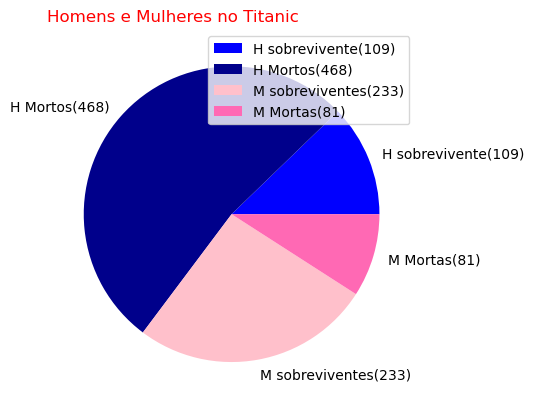

In [6]:
# % de homens que sobreviveu x mulheres grafico de pizza
sexos = df['sex'].value_counts()

# % homens sobreviventes
h_sobreviventes = df.loc[(df['sex'] == 'male') & (df['survived'] == 1), 'survived'].count()
h_morreram = sexos['male'] - h_sobreviventes

# % mulheres sobreviventes

m_sobreviventes = df.loc[(df['sex'] == 'female') & (df['survived'] == 1), 'survived'].count()
m_morreram = sexos['female'] - m_sobreviventes

plotados = [h_sobreviventes, h_morreram, m_sobreviventes, m_morreram]
nomes = ["H sobrevivente(109)", "H Mortos(468)", "M sobreviventes(233)", "M Mortas(81)"]
cores = ["b", "darkblue", "pink", "hotpink"]

# Gráfico
plt.pie(plotados, labels=nomes, colors=cores)
plt.title('Homens e Mulheres no Titanic', loc='left', color="red")
plt.legend()

# Analisando as porcentagens
p_homens   = (h_sobreviventes/sexos['male'] * 100).round(1)
p_mulheres = (m_sobreviventes/sexos['female'] * 100).round(1)

print(f'Porcentagem de sobrevivencia dos Homens: {p_homens}%')
print(f'Porcentagem de sobrevivencia das mulheres: {p_mulheres}%')

In [7]:
# sera que a maioria dos mortos foi entre homens adultos? 
h_morreram = sexos['male'] - h_sobreviventes
m_morreram = sexos['female'] - m_sobreviventes

# Pegar a quantidade de hoemens com mais de 20 anos que morreram e comparar com a quantidade total de mortos
h_morreram_mais_de_20_anos = df.loc[(df['sex'] == 'male') & (df['age'] >= 20) & (df['survived'] == 0), 'survived'].count()
p_h_mais_20_anos_mortos  = (h_morreram_mais_de_20_anos /h_morreram * 100).round(1)

# Fazendo a mesma coisa com as mulheres
m_morreram_mais_de_20_anos = df.loc[(df['sex'] == 'female') & (df['age'] >= 20) & (df['survived'] == 0), 'survived'].count()
p_m_mais_20_anos_mortos  = (m_morreram_mais_de_20_anos /m_morreram * 100).round(1)

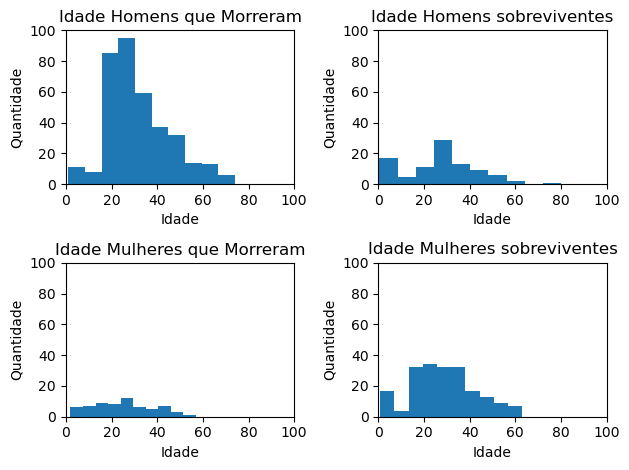

In [8]:
# Plotar um gráfico de idade dos que morreram e sobreviveram, vou fazer 4 gráficos
idades_homens_que_morreram = df.loc[(df['survived'] == 0) & (df['sex'] == 'male'), 'age']
idades_homens_que_sobreviventes = df.loc[(df['survived'] == 1) & (df['sex'] == 'male'), 'age']

idades_mulheres_que_morreram = df.loc[(df['survived'] == 0) & (df['sex'] == 'female'), 'age']
idades_mulheres_que_sobreviventes = df.loc[(df['survived'] == 1) & (df['sex'] == 'female'), 'age']

plt.subplot(2,2,1)
plt.xlim(0,100)
plt.ylim(0,100)
plt.hist(idades_homens_que_morreram)
plt.title("Idade Homens que Morreram")
plt.xlabel("Idade")
plt.ylabel("Quantidade")

plt.subplot(2,2,2)
plt.xlim(0,100)
plt.ylim(0,100)
plt.hist(idades_homens_que_sobreviventes)
plt.title("Idade Homens sobreviventes")
plt.xlabel("Idade")
plt.ylabel("Quantidade")

plt.subplot(2,2,3)
plt.xlim(0,100)
plt.ylim(0,100)
plt.hist(idades_mulheres_que_morreram)
plt.title("Idade Mulheres que Morreram")
plt.xlabel("Idade")
plt.ylabel("Quantidade")

plt.subplot(2,2,4)
plt.xlim(0,100)
plt.ylim(0,100)
plt.hist(idades_mulheres_que_sobreviventes)
plt.title("Idade Mulheres sobreviventes")
plt.xlabel("Idade")
plt.ylabel("Quantidade")

plt.tight_layout()
plt.show()

# Conclusão
Mesmo tendo o dobro de homens no navio, a quantidade de sobreviventes homens foi apenas a metade da de mulheres

# terei que plotar o gráfio em porcentagm de idade por gênero para chegar a uma conclusão real
 . Porcentagem de sobrevivencia dos Homens: 18.9% 
 . Porcentagem de sobrevivencia das mulheres: 74.2%

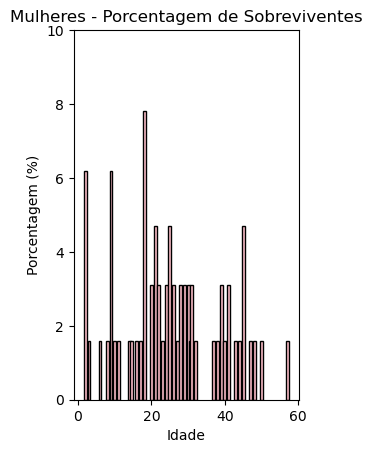

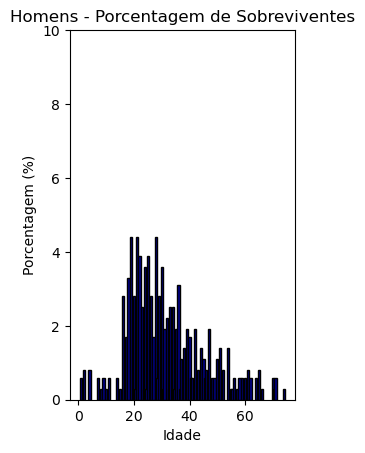

In [54]:
# Este gráfico responderá a pergunta: dividido por idade e gênero, quantos % morreram e quais foram os grupos mais afetados?
# grafico de barras rosa e azul de lado

# Mulheres -> cálculo da porcentagem de mortes por idade
mulheres = df[(df['sex'] == 'female') & (df['survived'] == 0)].groupby('age').size().reset_index()
mulheres = mulheres.rename(columns={0: 'Quantidade'})

q_mulheres = mulheres['Quantidade'].sum()

idade_m_porcentagem = (mulheres['Quantidade'] / q_mulheres * 100).round(1)

#homens
homens = df[(df['sex'] == 'male') & (df['survived'] == 0)].groupby('age').size().reset_index()
homens = homens.rename(columns={0: 'Quantidade'})

q_homens = homens['Quantidade'].sum()

idade_h_porcentagem = (homens['Quantidade'] / q_homens * 100).round(1)

# M
plt.subplot(1, 2, 1)
plt.bar(mulheres['age'], idade_m_porcentagem, color='pink', edgecolor='black')
plt.xlabel('Idade')
plt.ylim(0, 10)
plt.ylabel('Porcentagem (%)')
plt.title('Mulheres - Porcentagem de Sobreviventes')
plt.show()

# H
plt.subplot(1, 2, 2)
plt.bar(homens['age'], idade_h_porcentagem, color='DarkBlue', edgecolor='black')
plt.xlabel('Idade')
plt.ylim(0, 10)
plt.ylabel('Porcentagem (%)')
plt.title('Homens - Porcentagem de Sobreviventes')
plt.show()
